# Assignment Python 1
### Nur Khofifah - PYTN-KS12-008


## Project Overview
The aim of this projects is to introduce you to data visualization with Python as concrete and as consistent as possible. Using what you’ve learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

This dataset contains:

lsoa_code: this represents a policing area
borough: the london borough for which the statistic is related
major_category: the major crime category
minor_category: the minor crime category
value: the count of the crime for that particular borough, in that particular month
year: the year of the summary statistic
month: the month of the summary statistic
Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. And the important things, Visualized the data. Examples of questions can be:

What is the change in the number of crime incidents from 2011 to 2016?
What were the top 3 crimes per borough in 2016?

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
import folium

## Loading Dataset

In [2]:
df = pd.read_csv('D:/Hacktiv8/london_crime_by_lsoa.csv')

In [3]:
# Tipe data dan nama kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [4]:
# Data samples - head
df.head(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [6]:
# Merge month and year into date format to simplify dating
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))
df

,lsoa_code,borough,major_category,minor_category,value,year,month,date
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2016-11-01
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2016-11-01
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,2015-05-01
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,2016-03-01
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,2008-06-01
...,...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2,2015-02-01
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6,2015-06-01
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2,2011-02-01
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5,2011-05-01


## Data Visualization


### Area Plot
Apakah ada kecenderungan musiman untuk jumlah kejahatan?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3040\2341536834.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_area = df.groupby(['date']).sum()['value']


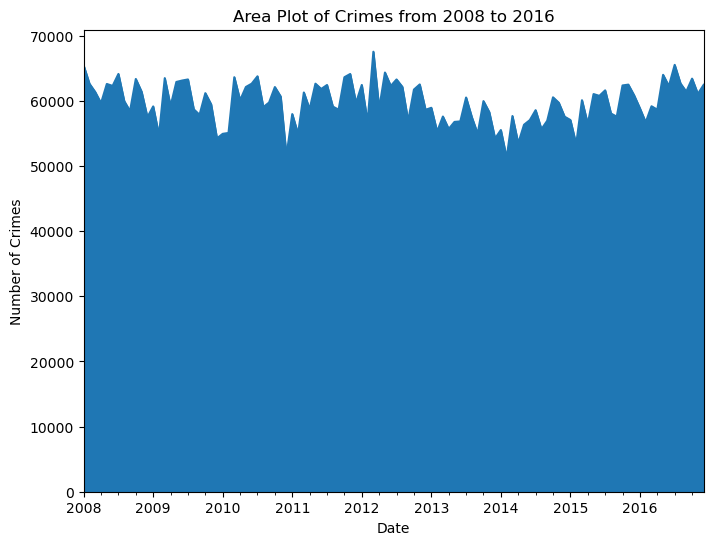

In [7]:
# Stage dataframe for plotting

df_area = df.groupby(['date']).sum()['value']
df_area.plot(kind='area', figsize=(8,6))

# Set axis to the graphs
plt.title('Area Plot of Crimes from 2008 to 2016') # add a title to the area plot
plt.ylabel('Number of Crimes') # add y-label
plt.xlabel('Date') # add x-label

plt.show()

Interpretasi:
- Ada tren 4 tahun dimana jumlah kejahatan menurun dan melonjak setiap empat tahun. Misalnya pada tahun 2008 hingga 2010, jumlah kejahatan berangsur-angsur menurun. Namun kemudian meningkat dan melonjak pada tahun 2012. Kecenderungan serupa terjadi antara tahun 2012 hingga 2016.
- Setiap tahun, jumlah kejahatan melonjak pada Q1 dan Q3, tetapi kemudian menurun pada Q2 dan Q4
- Secara keseluruhan, tidak ada perubahan signifikan pada jumlah tren kejahatan selama 8 tahun (dari 2008 hingga 2016)

### Histogram
Pada kategori major, kejahatan apa yang paling sering terjadi?

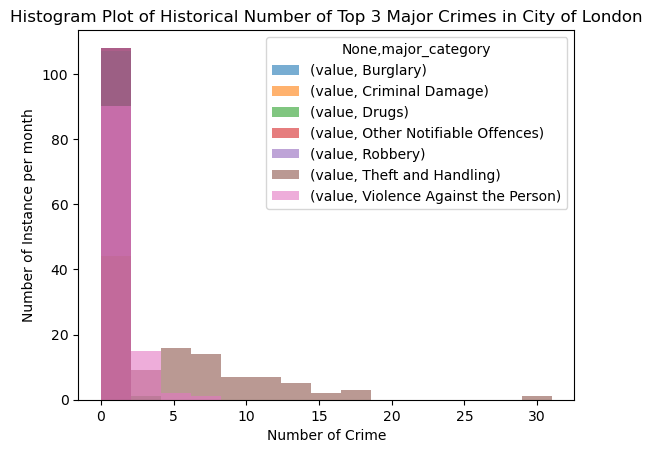

In [8]:
# Stage dataframe for plotting
df_hist = df[df['borough'].isin(['City of London'])]
df_hist = df_hist.groupby(['date','major_category']).agg({
    'value':'sum'
})
df_hist = df_hist.unstack('major_category')

df_hist.plot(kind='hist',
            bins=15,
            alpha=0.6,
            )

# # Set axis to the graphs
plt.title('Histogram Plot of Historical Number of Top 3 Major Crimes in City of London') # add a title to the area plot
plt.ylabel('Number of Instance per month') # add y-label
plt.xlabel('Number of Crime') # add x-label

plt.show()

Interpretasi:
- Kejahatan Pencurian dan Penanganan (Theft and Handling) merupakan kejahatan yang paling sering terjadi di Kota London, yang bisa mencapai 15-30 kasus dalam sebulan.
- Violence Against the Person menjadi kejahatan kedua yang paling sering terjadi di Kota London, yang berkisar antara 3 - 7 kasus per bulan.
- Kasus lain jarang terjadi (0 - 1 kasus per bulan)

### Bar Chart
Wilayah (borough) mana yang memiliki kejahatan paling banyak dan paling sedikit terjadi dalam 5 tahun terakhir

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3040\3690247863.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_area = df_area.groupby(['borough']).sum()['value']


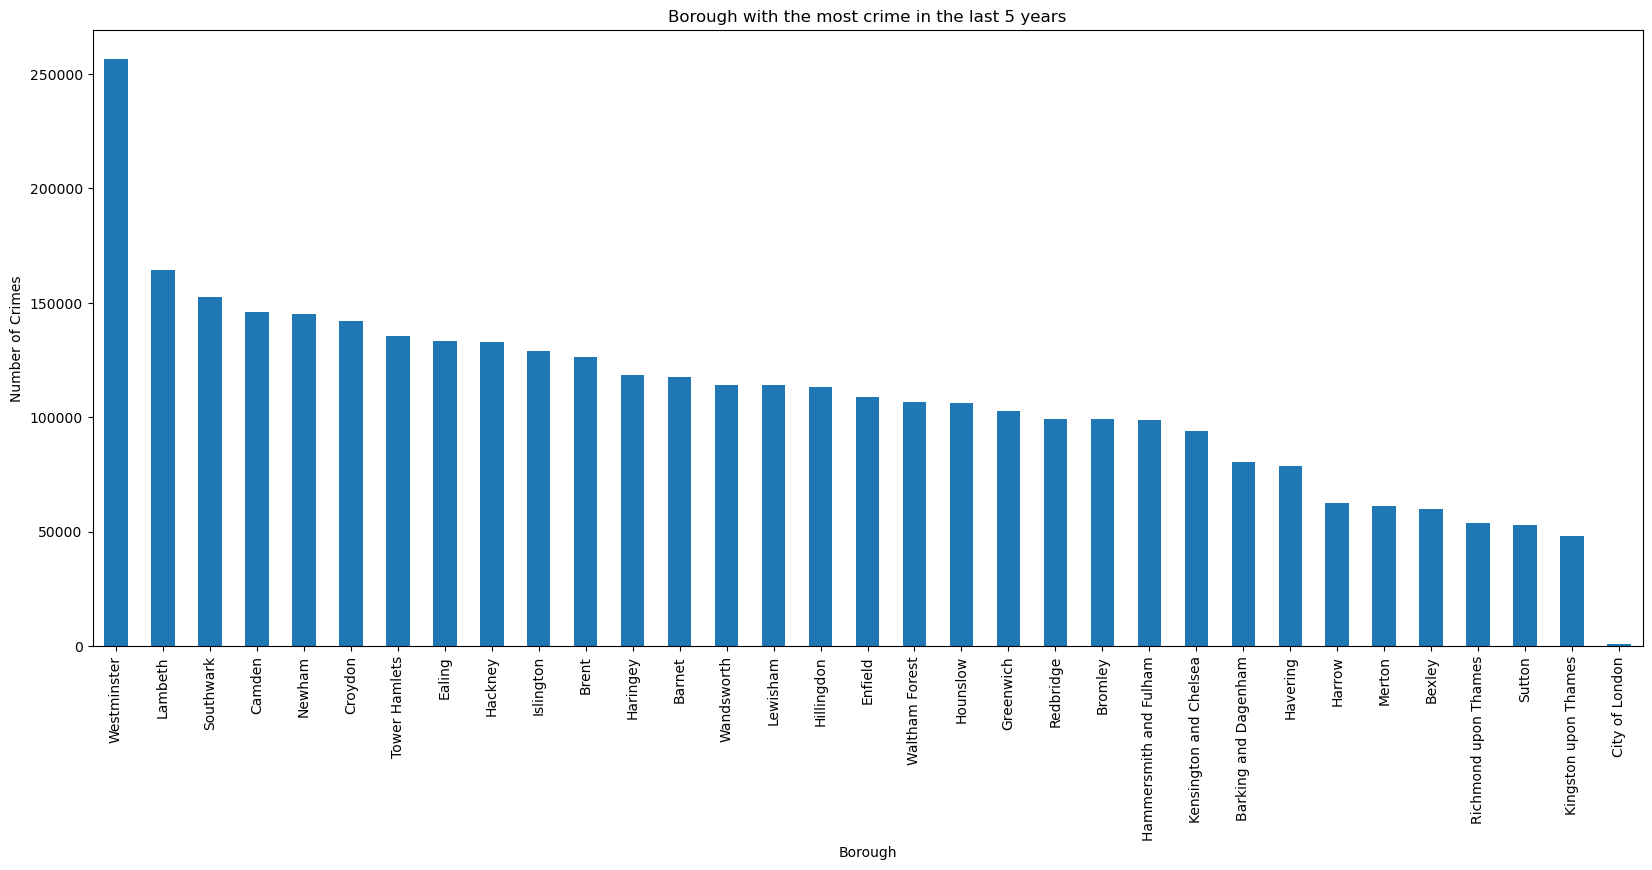

In [9]:
# Stage dataframe for plotting

df_area = df[df['year'].isin([2012,2013,2014,2015,2016])]
df_area = df_area.groupby(['borough']).sum()['value']
df_area = df_area.sort_values(ascending=False)
df_area.plot(kind='bar', figsize=(20,8))

# Set axis to the graphs
plt.title('Borough with the most crime in the last 5 years') # add a title to the area plot
plt.ylabel('Number of Crimes') # add y-label
plt.xlabel('Borough') # add x-label

plt.show()

Interpretasi:
- Westminster memiliki jumlah kejahatan tertinggi dalam 5 tahun terakhir. Kemunculannya jauh lebih tinggi dibandingkan wilayah lain
- Kejahatan hampir tidak pernah terjadi di City ofLondon (mendekati 0)

### Pie Chart
Pada kategori major, kejahatan apa yang paling sering terjadi dalam 5 tahun terakhir?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3040\806977854.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pie = df_pie.groupby('major_category', axis=0).sum()


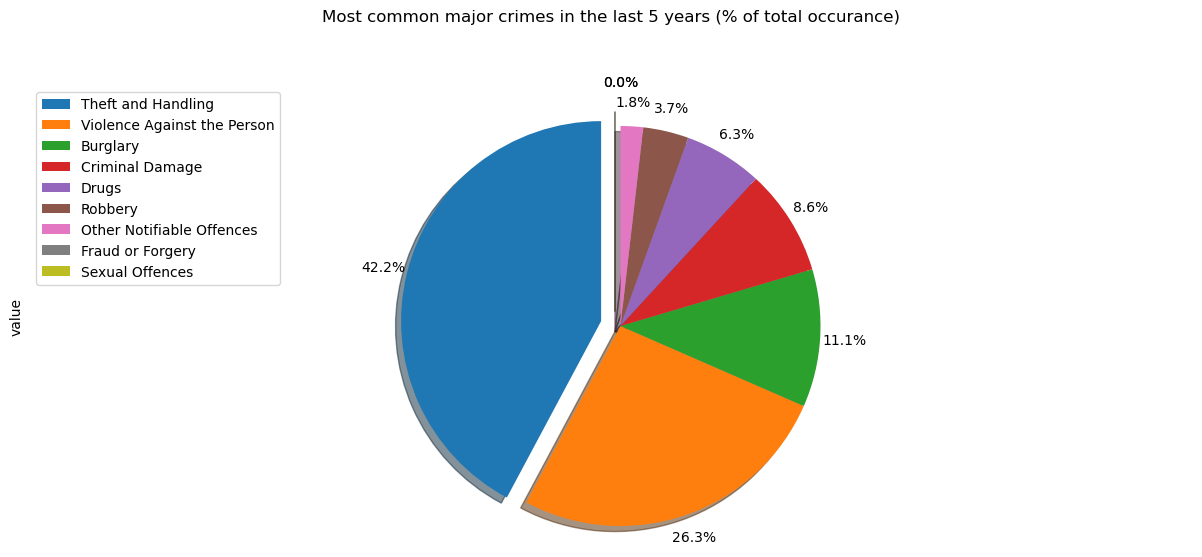

In [10]:
# Stage dataframe for plotting

df_pie = df[df['year'].isin([2012,2013,2014,2015,2016])]
df_pie = df_pie.groupby('major_category', axis=0).sum()
df_pie = df_pie.sort_values(by=['value'], ascending=False)

# ratio for each continent with which to offset each wedge.
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0.1, 0.1]

# Graded-Funtion Begin (~8 Lines)
df_pie['value'].plot(kind='pie',
                      figsize=(15, 6),
                      autopct='%1.1f%%',
                      startangle=90,
                      shadow=True,
                      labels=None,         # turn off labels on pie chart
                      # the ratio between the center of each pie slice and the start of the text generated by autopct
                      pctdistance=1.12,
                      explode=explode_list  # 'explode'
                      )
# Graded-Funtion End

# scale the title up by 12% to match pctdistance
plt.title('Most common major crimes in the last 5 years (% of total occurance)', y=1.12)

plt.axis('equal')

# add legend
plt.legend(labels=df_pie.index, loc='upper left')

plt.show()

Interpretasi:
- 3 kejahatan paling sering terjadi di London berdasarkan kejadiannya dalam 5 tahun terakhir adalah: Theft and Handling (Pencurian dan Penanganan)dengan persentase sebesar 42.2%,  Violence Against the Person(Kekerasan Terhadap Orang) dengan persentase 26.3%, dan Burglary(Perampokan) dengan persentase 11.1%
- Theft and Handling crime and Violence Against the Person crime secara signifikan lebih tinggi dibandingkan dengan jenis kejahatan lainnya
- Kejahatan Fraud or Forgery(Penipuan atau Pemalsuan) dan Secual Offences(Pelanggaran Hukum) tidak pernah terjadi dalam 5 tahun terakhir

### Box Plot
Di 3 wilayah teratas dengan angka kejahatan tinggi, apakah situasinya membaik selama 5 tahun terakhir?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3040\2811081552.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_box_firstfive = df_box_firstfive.groupby(['year'], axis=0).sum()['value']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3040\2811081552.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_box_secondfive = df_box_secondfive.groupby(['year'], axis=0).sum()['value']


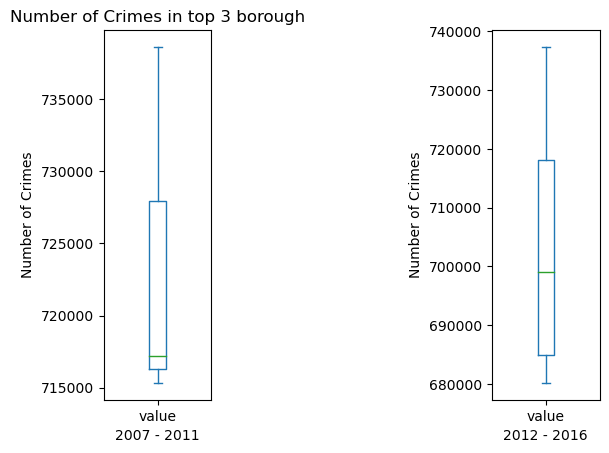

In [11]:
#Set subplot
fig = plt.figure()
ax0 = fig.add_subplot(1,4,1)
ax1 = fig.add_subplot(1,4,4)

# Stage dataframe for plotting
df_box = df[df['borough'].isin(['Westminster', 'Lambeth', 'Southwark'])]

# First 5 years
df_box_firstfive = df[df['year'].isin(range(2007,2011))]
df_box_firstfive = df_box_firstfive.groupby(['year'], axis=0).sum()['value']

df_box_firstfive.plot(kind='box', ax=ax0)

# Second 5 years
df_box_secondfive = df[df['year'].isin(range(2012,2016))]
df_box_secondfive = df_box_secondfive.groupby(['year'], axis=0).sum()['value']

df_box_secondfive.plot(kind='box', ax=ax1)

# Set axis to the graphs
ax0.set_title('Number of Crimes in top 3 borough')
ax0.set_xlabel('2007 - 2011')
ax0.set_ylabel('Number of Crimes')

ax1.set_xlabel('2012 - 2016')
ax1.set_ylabel('Number of Crimes')

plt.show()

Interpretasi:
- Jumlah kejahatan tahunan rata-rata di 3 wilayah teratas mengalami penurunan selama 5 tahun terakhir (dari sekitar 715 ribu per tahun menjadi kurang dari 700 ribu per tahun)
- Peningkatan ini signifikan karena jumlah kejahatan tahunan terkecil antara 2017 - 2011 masih lebih tinggi dari rata-rata jumlah kejahatan tahunan antara 2012 - 2016.
- Namun jumlah tahunan tertinggi masih lebih dari 730 ribu kasus dalam setahun

### Scatter Plot
Di 3 wilayah teratas dengan angka kriminalitas tinggi, berapa tren angka kriminalitas setiap tahunnya?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3040\2015629092.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_scat = pd.DataFrame(df_scat.groupby(['year']).sum())


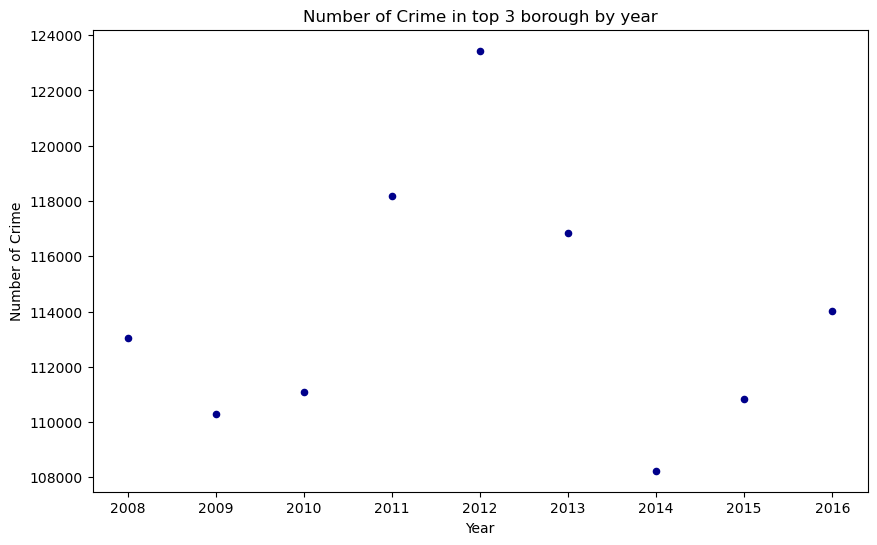

In [12]:
# Stage dataframe for plotting
df_scat = df[df['borough'].isin(['Westminster', 'Lambeth', 'Southwark'])]
df_scat = pd.DataFrame(df_scat.groupby(['year']).sum())
df_scat.reset_index(inplace=True)
df_scat['year'] = range(2008,2017)

df_scat.plot(kind='scatter', x='year', y='value', figsize=(10, 6), color='darkblue')

# Set axis to the graphs
plt.title('Number of Crime in top 3 borough by year')
plt.xlabel('Year')
plt.ylabel('Number of Crime')

plt.show()

Interpretasi:
- Jumlah kejahatan mengalami lonjakan yang signifikan pada tahun 2011 dan 2012, memuncak pada total hampir 122 ribu kasus di 3 wilayah teratas.
- Setelah tahun 2012, jumlah kejahatan menurun ke angka terendah pada lebih dari 108 ribu kasus
- Pola kejahatan musiman juga berlaku di sini, dimana jumlah kejahatan menurun dan meningkat setiap 4 tahun sekali

### Word Clouds

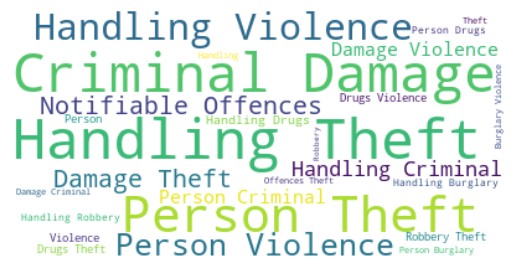

In [13]:
# Data stagging for visualisation

df_woc = df[df['year'].isin([2012,2013,2014,2015,2016])]
df_woc = df_woc[df_woc['borough'].isin(['City of London'])]
df_woc = df_woc['major_category'].str.cat(sep=' ')

# make word cloud
stopwords = set(STOPWORDS)

df_wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate word cloud
df_wordcloud.generate(df_woc)

plt.imshow(df_wordcloud, interpolation='bilinear')

plt.axis('off')
plt.show()

### Folium

In [14]:
# Set latitude and longitude
latitude = 51.5074
longitude = 0.1278

# Generate Folium Map
london_map = folium.Map(location=[latitude,longitude], zoom_start=8) 
london_map

## Analisis Keseluruhan
Dataset ini memiliki 7 Atribut/feature terdapat 9 kategori major dan 32 jenis kejahatan kategori minor dari periode tahun 2008 - 2016. Data hasil Pie chart diatas kita dapat melihat bahwa kejahatan dengan jumlah tertinggi pada major crime category adalah Theft and Handling dengan persentase 42.2%, dan diikuti Violence Against the Person dengan persentase 26.3%. Pada Bar chart diketahui bahwa Westminster merupakan wilayah dengan jumlah kejahatan tertinggi dalam 5 tahun terakhir, sedangkan pada City of London hampir tidak pernah terjadi kejahatan. berdasarkan area plot dan scatter plot diketahui bahwa terdapat pola musiman yaitu jumlah kejahatan menurun dan melonjak setiap empat tahun